# Finding normal depth with Manning's equation

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

-------------------------------------------------

In [1]:
#Do not change this cell. It is for setting things up.

#make plots inline
%matplotlib inline

#import the preamble in the parent directory
import sys
sys.path.append("../..")
from preamble import *

Start to load preamble.
Finished loading preamble.


In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

This notebook is to demonstrate the use of different methods to find the normal depth with Manning's equation in open channel flows. 

The Manning's equation is one of most celebrated equations in hydraulic engineering. It was proposed by Robert Manning in 1889 as an alternative to the Chezy equation. The Manning's equation is a half-emperical half-theoretical equation for unifrom flow in open channels. It has the form of:
\begin{equation}
Q = \frac{k_n}{n}A(y)R(y)^{2/3}S_o^{1/2}
\end{equation}
where $Q$ is the discharge, $k_n$ is a unit conversion factor (=1.0 in SI and 1.486 in English unit system), $n$ is the Manning's roughness coefficient, $A$ is flow area, $R$ is hydraulic radius, and $S_o$ is channel slope. The hydraulic radius is defined as:
\begin{equation}
R(y) = \frac{A(y)}{P(y)}
\end{equation}
where $P(y)$ is the wetted perimeter. The functional forms of $A(y)$ and $R(y)$ depends on the geometric shape of the cross section. In this example, we will use a rectangular cross section with a bottom width of $B$. As such, 
\begin{equation}
A(y) = By
\end{equation}
\begin{equation}
P(y) = B + 2y
\end{equation}
\begin{equation}
R(y) = \frac{By}{B+2y}
\end{equation}

Given $Q$, $n$, and $S_o$, the Manning's equation is an implicit equation for water depth $y$. To solve for $y$, it is essentially to find the root of the Manning's equation. This example will use the Newton's method (also known as the Newton-Raphson method). To find the root, the Manning's equation is written as
\begin{equation}
f(y) = Q - \frac{k_n}{n}A(y)R(y)^{2/3}S_o^{1/2} = 0
\end{equation}
and the iterative process using the Newton's method is
\begin{equation}
y_{n+1} = y_n - \frac{f(y_n)}{f'(y_n)}
\end{equation}
until a specified accuracy $\epsilon$ is reached, i.e.,
\begin{equation}
\left|y_{n+1} - y_n \right| < \epsilon.
\end{equation}

In fact, the key and probably the most difficult part of the Newton's method is to evaluate the derivative $f'(y)$. If the functional form of $f(y)$ is complex, it will expensive to evaluate the derivative. As an alternative, the derivative can approximated numerically with a finite difference method. In such case, the method is called the secant method. Indeed, the secant methods is much older the Newton's method. The numerical approximation of the derivative can be written as
\begin{equation}
f'(y_n) = \frac{f(y_{n})-f(y_{n-1})}{y_{n} - y_{n-1}}.
\end{equation}

Due to the complexity of the Manning's equation (stemmed from the cross sectional geomtry), we will use the secant method. The implementation here uses the example code as a reference:
[prog4comp](https://github.com/hplgit/prog4comp/blob/master/src/py/secant_method.py).

SI unit system is used in this example. Thus, $k_n$ = 1.0.

More resources can be found online:
* [wikipedia.org](https://en.wikipedia.org/wiki/Manning_formula)
* [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)
* [Secant method](https://en.wikipedia.org/wiki/Secant_method)

The following concetps in Python are used:
* function
* Numpy array
* while, for, exception
* plotting and graphic visulization
* scipy library (for comparison)

Note: This notebook uses Python v3.x. 

### Required input (SI unit)

In [7]:
#discharge (m^3/s)
Q=10.0

#Manning's n
n = 0.03

#channel slope
So = 1e-5

#chanenl bottom width - rectangular
B = 10.0

#initial guess of the normal depth (m)
y0 = 1.0
y1 = y0 - 0.1

#accuracy 
epsilon = 1e-6

## Define functions 

In [8]:
def secant(f, y0, y1, args):
    eps = args[4]
    f_y0 = f(y0,args)
    f_y1 = f(y1,args)
    iteration_counter = 0
    while abs(f_y1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_y1 - f_y0)/(y1 - y0)
            y = y1 - float(f_y1)/denominator
        except ZeroDivisionError:
            print("Error! - denominator zero for y = ", y)
            sys.exit(1)     # Abort with error
        y0 = y1
        y1 = y
        f_y0 = f_y1
        f_y1 = f(y1,args)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_y1) > eps:
        iteration_counter = -1
    return y, iteration_counter

def f(y,args):
    Q,n,So,B,epsilon = args
    area = B*y 
    wetted_perimeter = B + 2.0*y
    R = area/wetted_perimeter
    residual = Q - 1.0/n*area*R**(2.0/3.0)*So**(0.5)
    return residual

## Main program to solve the problem

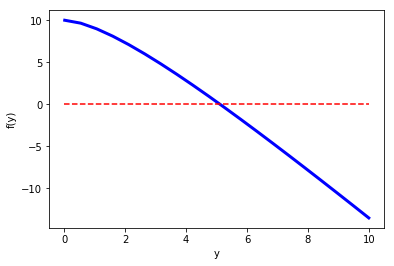

Number of function calls: 7
A solution is: 5.112424
A solution from using scipy is: 5.112424


In [9]:
# pack all arguments into args0:
# Q, n, So, B
args0 = [Q, n, So, B, epsilon]
#print(args0)

#(optional) plot the function to have an idea of where the roots are located.
y = np.linspace(0.01, 10, num=20, endpoint=True)
f_val = f(y,args0)

plt.figure(figsize=(6,4))
plt.plot(y,f_val,'b',linewidth=3)
plt.plot([0,10],[0,0],'r',linestyle="--")
plt.xlabel('y')
plt.ylabel('f(y)')
#plt.legend()
plt.show()
#End of optional plot


solution, no_iterations = secant(f, y0, y1, args0)

if no_iterations > 0:    # Solution found
    print("Number of function calls: %d" % (2 + no_iterations))
    print("A solution is: %f" % (solution))
else:
    print("Solution not found!")
    
#compare your solution with the one from scipy
#see the documentation for scipy.optimize.root(...) function
sol = sp_opt.root(f, [0], args0, method='hybr')
print("A solution from using scipy is: %f" % sol.x[0])
